# EDA  

* 요인 분석의 경우 추가 변수에 대해서만 EDA 및 시각화를 진행하면 되기 때문에 상관 분석과 같은 변수를 가지고 있어, 상관 분석에 대한 시각화만을 진행한다.

* eda를 위한 데이터프레임은 따로 엑셀파일로 저장하여 불러왔다. 해당 데이터프레임은 상관분석 과정을 마치고, 사용할 추가 변수를 추가하고 null값을 채워준 전처리 이전까지 단계가 시행된 데이터프레임이다.

In [ ]:
# 나눔 폰트 설치 / 한글 깨짐 방지 , 런타임 다시 시작하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [ ]:
!pip install openpyxl

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='NanumGothic') #matplotlib 한글 깨짐 방지

In [ ]:
# 시각화에 사용할 팔레트 확인
plt.style.available

sns.color_palette("pastel")
sns.set(palette='pastel')

# 후지

In [ ]:
fuji= pd.read_excel("/home/work/.data/data/fuji_eda_data.xlsx")
fuji

조사일 과원이름  11월 일조율(%)  5월 월합강수량(00~24h만)(mm)  9월 월합강수량(00~24h만)(mm)  \
0   2015-11-02   김제       51.68                   40.6                   36.7   
1   2015-11-02   김제       51.68                   40.6                   36.7   
2   2015-11-02   김제       51.68                   40.6                   36.7   
3   2015-11-02   김제       51.68                   40.6                   36.7   
4   2015-11-02   김제       51.68                   40.6                   36.7   
..         ...  ...         ...                    ...                    ...   
707 2022-10-27   포천       54.76                   16.4                  204.5   
708 2022-10-27   포천       54.76                   16.4                  204.5   
709 2022-10-27   포천       54.76                   16.4                  204.5   
710 2022-10-27   포천       54.76                   16.4                  204.5   
711 2022-10-27   포천       54.76                   16.4                  204.5   

     9월 평균 상대습도(%)  6월 평균 상대습도(%)  3월 월합강수량(00~24h만)(mm)  3월 평균 최고기온(°C)  \
0               72             70                   30.5            14.3   
1               72             70                   30.5            14.3   
2               72             70                   30.5            14.3   
3               72             70                   30.5            14.3   
4               72             70                   30.5            14.3   
..             ...            ...                    ...             ...   
707             79             81                   91.0            13.6   
708             79             81                   91.0            13.6   
709             79             81                   91.0            13.6   
710             79             81                   91.0            13.6   
711             79             81                   91.0            13.6   

     10월 일조율(%)  12월 합계 일사량(MJ/m2)  12월 일조율(%)  품질  조사연도  태풍횟수  태풍평균강도  폭염일수  \
0      66.14000             222.33       47.38   2  2015     4   54.25    17   
1      66.14000             222.33       47.38   2  2015     4   54.25    17   
2      66.14000             222.33       47.38   4  2015     4   54.25    17   
3      66.14000             222.33       47.38   2  2015     4   54.25    17   
4      66.14000             222.33       47.38   1  2015     4   54.25    17   
..          ...                ...         ...  ..   ...   ...     ...   ...   
707    58.45816             248.82       62.20   3  2022     5   33.60     9   
708    58.45816             248.82       62.20   2  2022     5   33.60     9   
709    58.45816             248.82       62.20   3  2022     5   33.60     9   
710    58.45816             248.82       62.20   2  2022     5   33.60     9   
711    58.45816             248.82       62.20   2  2022     5   33.60     9   

     장마일수  합계강수량  
0      36  193.5  
1      36  193.5  
2      36  193.5  
3      36  193.5  
4      36  193.5  
..    ...    ...  
707    33  249.1  
708    33  249.1  
709    33  249.1  
710    33  249.1  
711    33  249.1  

[712 rows x 19 columns]

# 데이터 시각화

과원별 품질 수

연도별 품질 수

요인 분포



In [ ]:
plt.rc('font', family='NanumGothic') #matplotlib 한글 깨짐 방지

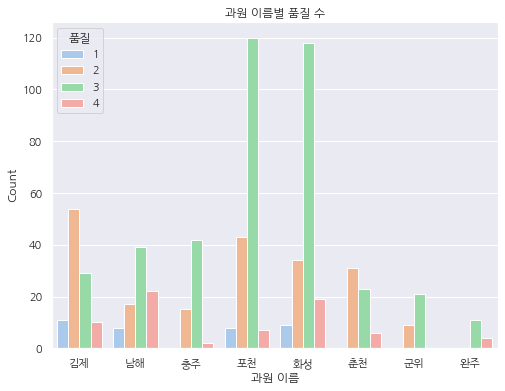

In [ ]:
# 과원별 품질 등급의 수
plt.figure(figsize=(8, 6))
sns.countplot(data=fuji, x='과원이름', hue='품질')
plt.title('과원 이름별 품질 수')
plt.xlabel('과원 이름')
plt.ylabel('Count')

plt.show()

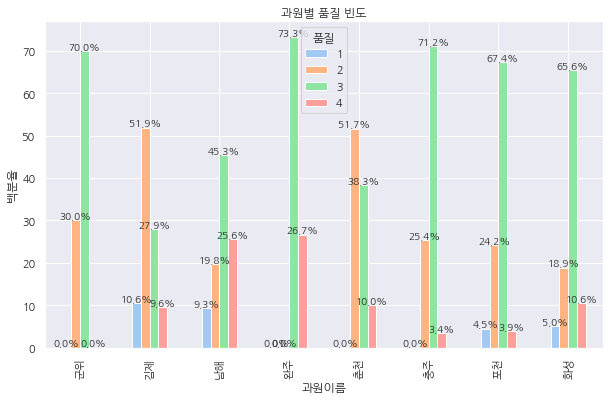

In [ ]:
# 과원별 품질의 비율
# 과원별 품질 빈도 카운트
quality_counts = fuji.groupby('과원이름')['품질'].value_counts().unstack(fill_value=0)

# 각 연도별로 품질 빈도의 백분율 계산
quality_percentage = quality_counts.div(quality_counts.sum(axis=1), axis=0) * 100

# 막대 그래프로 시각화
ax = quality_percentage.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('과원별 품질 빈도')
plt.xlabel('과원이름')
plt.ylabel('백분율')
plt.legend(title='품질')

# 각 막대의 백분율 텍스트 레이블 추가
for container in ax.containers:
    ax.bar_label(container, fmt='%1.1f%%', label_type='edge')

plt.show()

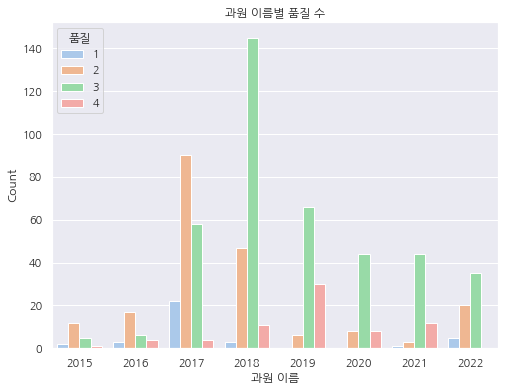

In [ ]:
# 연도별 품질 등급의 수
plt.figure(figsize=(8, 6))
sns.countplot(data=fuji, x='조사연도', hue='품질')
plt.title('과원 이름별 품질 수')
plt.xlabel('과원 이름')
plt.ylabel('Count')

plt.show()

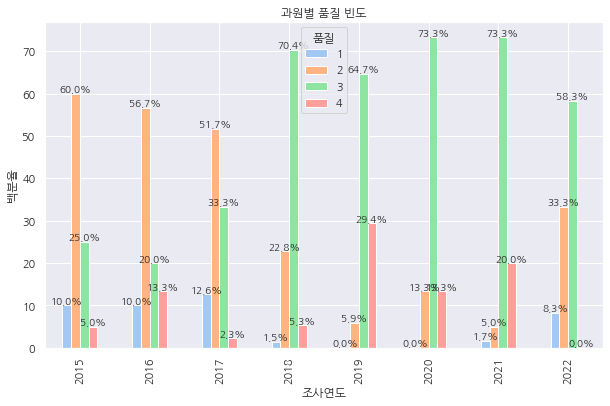

In [ ]:
# 연도별 품질의 비율
# 연도별 품질 빈도 카운트
quality_counts = fuji.groupby('조사연도')['품질'].value_counts().unstack(fill_value=0)

# 각 연도별로 품질 빈도의 백분율 계산
quality_percentage = quality_counts.div(quality_counts.sum(axis=1), axis=0) * 100

# 막대 그래프로 시각화
ax = quality_percentage.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('과원별 품질 빈도')
plt.xlabel('조사연도')
plt.ylabel('백분율')
plt.legend(title='품질')

# 각 막대의 백분율 텍스트 레이블 추가
for container in ax.containers:
    ax.bar_label(container, fmt='%1.1f%%', label_type='edge')

plt.show()

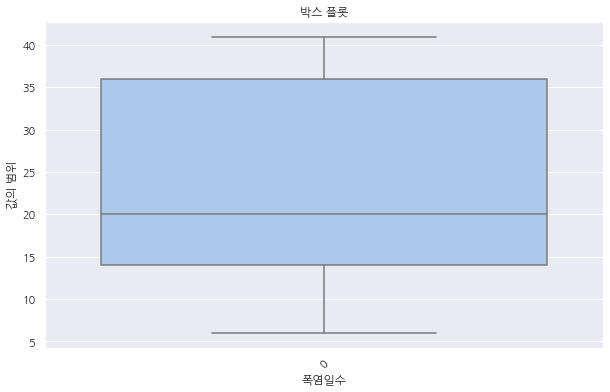

In [ ]:
# 폭염일수 box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=fuji['폭염일수'])
plt.title('박스 플롯')
plt.xlabel('폭염일수')
plt.ylabel('값의 범위')
plt.xticks(rotation=45)
plt.show()

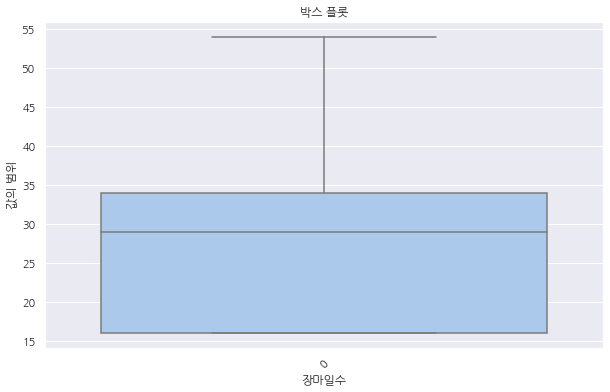

In [ ]:
# 장마일수 box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=fuji['장마일수'])
plt.title('박스 플롯')
plt.xlabel('장마일수')
plt.ylabel('값의 범위')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import plotly.express as px

* 과원이름

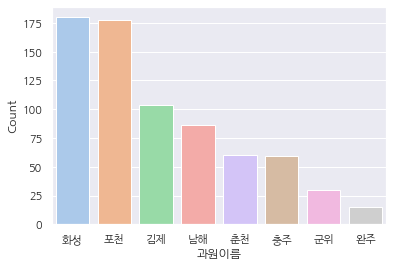

In [ ]:
# (1) 과원이름 변수 분포 확인하기
data_name = fuji['과원이름'].value_counts()
sns.barplot(x=data_name.index, y=data_name.values )
plt.xlabel('과원이름')
plt.ylabel('Count')
plt.show()

In [ ]:
# (2-1) 과원이름과 품질
px.box(x = '과원이름', y = '품질', data_frame = fuji, template = 'ggplot2')

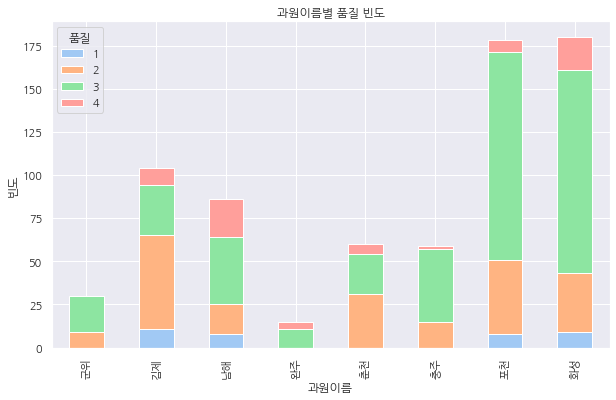

In [ ]:
# (2-2) 과원이름과 품질

quality_counts = fuji.groupby('과원이름')['품질'].value_counts().unstack(fill_value=0)

# 막대 그래프로 시각화
quality_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('과원이름별 품질 빈도')
plt.xlabel('과원이름')
plt.ylabel('빈도')
plt.legend(title='품질')
plt.show()

* 품질

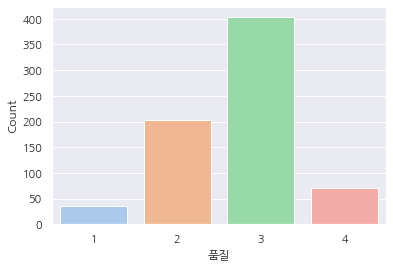

In [ ]:
# (1) 품질 분포 확인하기
data_name = fuji['품질'].value_counts()
sns.barplot(x=data_name.index, y=data_name.values )
plt.xlabel('품질')
plt.ylabel('Count')
plt.show()

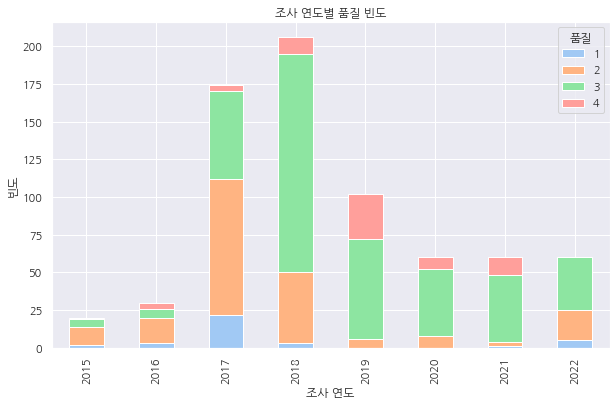

In [ ]:
# (2) 조사 연도별 품질 빈도 카운트
quality_counts = fuji.groupby('조사연도')['품질'].value_counts().unstack(fill_value=0)

# 막대 그래프로 시각화
quality_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('조사 연도별 품질 빈도')
plt.xlabel('조사 연도')
plt.ylabel('빈도')
plt.legend(title='품질')
plt.show()

- '11월 일조율(%)'

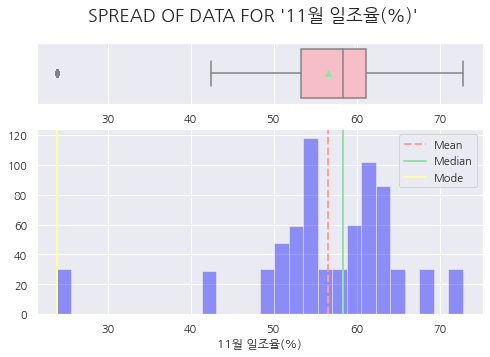

In [ ]:
# (1) 11월 일조율(%)의 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=fuji['11월 일조율(%)'].mean()
median=fuji['11월 일조율(%)'].median()
mode=fuji['11월 일조율(%)'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR '11월 일조율(%)'"  , fontsize=18, fontweight='bold')
sns.boxplot(x=fuji['11월 일조율(%)'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(fuji['11월 일조율(%)'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [ ]:
# (2) '11월 일조율(%)' 품질별 그래프
fig = px.box(fuji, x='품질', y='11월 일조율(%)', title='품질별 11월 일조율(%) 분포')
fig.show()

* '5월 월합강수량(00~24h만)(mm)'

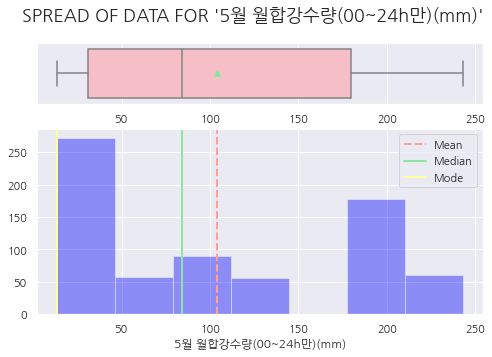

In [ ]:
# (1) 5월 월합강수량(00~24h만)(mm)의 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=fuji['5월 월합강수량(00~24h만)(mm)'].mean()
median=fuji['5월 월합강수량(00~24h만)(mm)'].median()
mode=fuji['5월 월합강수량(00~24h만)(mm)'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR '5월 월합강수량(00~24h만)(mm)'"  , fontsize=18, fontweight='bold')
sns.boxplot(x=fuji['5월 월합강수량(00~24h만)(mm)'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(fuji['5월 월합강수량(00~24h만)(mm)'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [ ]:
# (2) '5월 월합강수량(00~24h만)(mm)' 품질별 그래프
fig = px.box(fuji, x='품질', y='5월 월합강수량(00~24h만)(mm)', title='품질별 5월 월합강수량 분포')
fig.show()

* '9월 월합강수량(00~24h만)(mm)'

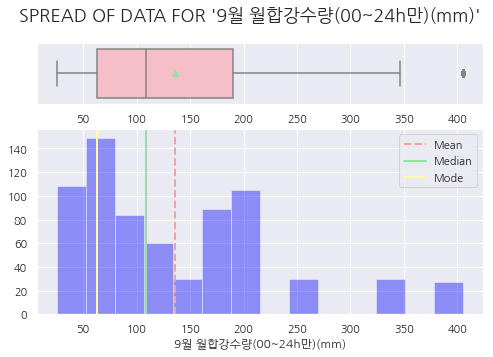

In [ ]:
# (1) '9월 월합강수량(00~24h만)(mm)'의 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=fuji['9월 월합강수량(00~24h만)(mm)'].mean()
median=fuji['9월 월합강수량(00~24h만)(mm)'].median()
mode=fuji['9월 월합강수량(00~24h만)(mm)'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR '9월 월합강수량(00~24h만)(mm)' "  , fontsize=18, fontweight='bold')
sns.boxplot(x=fuji['9월 월합강수량(00~24h만)(mm)'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(fuji['9월 월합강수량(00~24h만)(mm)'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [ ]:
# (2) 품질별 '9월 월합강수량(00~24h만)(mm)' 그래프
fig = px.box(fuji, x='품질', y='9월 월합강수량(00~24h만)(mm)', title='품질별 9월 월합강수량(00~24h만)(mm) 분포')
fig.show()

* '9월 평균 상대습도(%)'

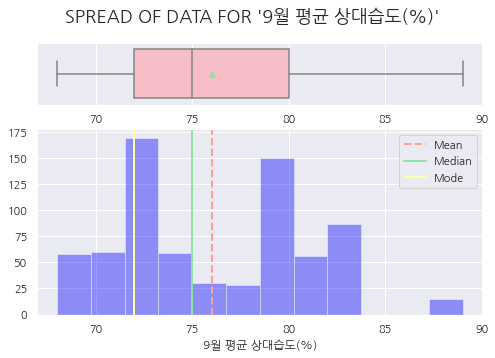

In [ ]:
# (1) 9월 평균 상대습도(%)의 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=fuji['9월 평균 상대습도(%)'].mean()
median=fuji['9월 평균 상대습도(%)'].median()
mode=fuji['9월 평균 상대습도(%)'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR '9월 평균 상대습도(%)'"  , fontsize=18, fontweight='bold')
sns.boxplot(x=fuji['9월 평균 상대습도(%)'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(fuji['9월 평균 상대습도(%)'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [ ]:
# (2) 품질별'9월 평균 상대습도(%)' 그래프
fig = px.box(fuji, x='품질', y='9월 평균 상대습도(%)', title='품질별 9월 평균 상대습도(%) 분포')
fig.show()

* '6월 평균 상대습도(%)'

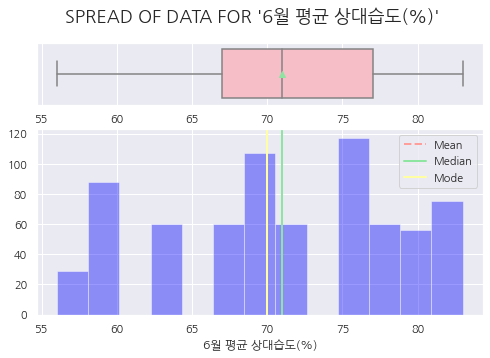

In [ ]:
# (1) 6월 평균 상대습도(%)의 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=fuji['6월 평균 상대습도(%)'].mean()
median=fuji['6월 평균 상대습도(%)'].median()
mode=fuji['6월 평균 상대습도(%)'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR '6월 평균 상대습도(%)'"  , fontsize=18, fontweight='bold')
sns.boxplot(x=fuji['6월 평균 상대습도(%)'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(fuji['6월 평균 상대습도(%)'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [ ]:
# (2) 품질별 '6월 평균 상대습도(%)' 그래프
fig = px.box(fuji, x='품질', y='6월 평균 상대습도(%)', title='품종별 6월 평균 상대습도 분포')
fig.show()

* '3월 월합강수량(00~24h만)(mm)'

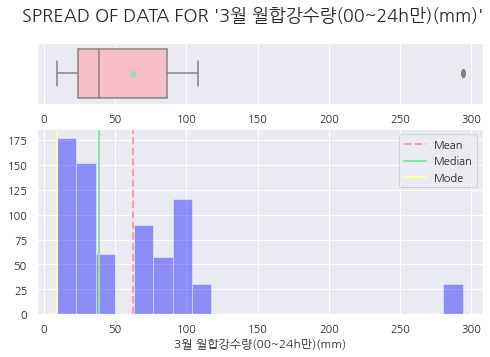

In [ ]:
# (1) '3월 월합강수량(00~24h만)(mm)'의 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=fuji['3월 월합강수량(00~24h만)(mm)'].mean()
median=fuji['3월 월합강수량(00~24h만)(mm)'].median()
mode=fuji['3월 월합강수량(00~24h만)(mm)'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR '3월 월합강수량(00~24h만)(mm)'"  , fontsize=18, fontweight='bold')
sns.boxplot(x=fuji['3월 월합강수량(00~24h만)(mm)'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(fuji['3월 월합강수량(00~24h만)(mm)'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [ ]:
# (2) 품질별 '3월 월합강수량(00~24h만)(mm)' 그래프
fig = px.box(fuji, x='품질', y='3월 월합강수량(00~24h만)(mm)', title='품질별 3월 월합강수량(00~24h만)(mm) 분포')
fig.show()

* '3월 평균 최고기온(°C)'

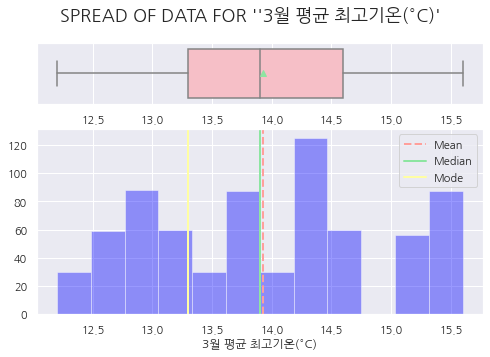

In [ ]:
# (1) 3월 평균 최고기온(°C)'의 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=fuji['3월 평균 최고기온(°C)'].mean()
median=fuji['3월 평균 최고기온(°C)'].median()
mode=fuji['3월 평균 최고기온(°C)'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR ''3월 평균 최고기온(°C)' "  , fontsize=18, fontweight='bold')
sns.boxplot(x=fuji['3월 평균 최고기온(°C)'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(fuji['3월 평균 최고기온(°C)'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [ ]:
# (2) 품질별 '3월 평균 최고기온(°C)' 그래프
fig = px.box(fuji, x='품질', y='3월 평균 최고기온(°C)', title='품질별 3월 평균 최고기온(°C) 분포')
fig.show()

* '10월 일조율(%)'

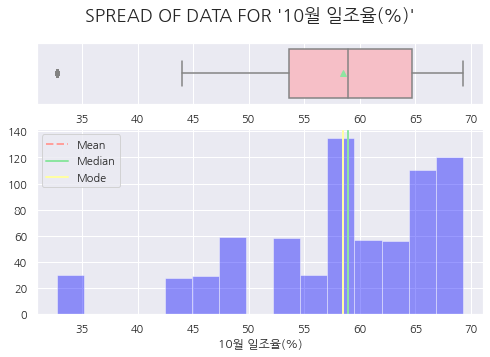

In [ ]:
# (1) '10월 일조율(%)'의 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=fuji['10월 일조율(%)'].mean()
median=fuji['10월 일조율(%)'].median()
mode=fuji['10월 일조율(%)'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR '10월 일조율(%)' "  , fontsize=18, fontweight='bold')
sns.boxplot(x=fuji['10월 일조율(%)'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(fuji['10월 일조율(%)'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [ ]:
# (2) 품질별 '10월 일조율(%)' 그래프
fig = px.box(fuji, x='품질', y='10월 일조율(%)', title='품질별 10월 일조율(%) 분포')
fig.show()

* '12월 합계 일사량(MJ/m2)'

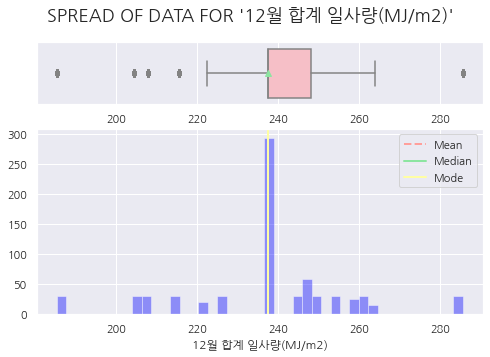

In [ ]:
# (1) '12월 합계 일사량(MJ/m2)'의 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=fuji['12월 합계 일사량(MJ/m2)'].mean()
median=fuji['12월 합계 일사량(MJ/m2)'].median()
mode=fuji['12월 합계 일사량(MJ/m2)'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR '12월 합계 일사량(MJ/m2)' "  , fontsize=18, fontweight='bold')
sns.boxplot(x=fuji['12월 합계 일사량(MJ/m2)'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(fuji['12월 합계 일사량(MJ/m2)'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [ ]:
# (2) 품질별 '12월 합계 일사량(MJ/m2)' 그래프
fig = px.box(fuji, x='품질', y='12월 합계 일사량(MJ/m2)', title='품질별 12월 합계 일사량(MJ/m2)')
fig.show()

* '12월 일조율(%)'

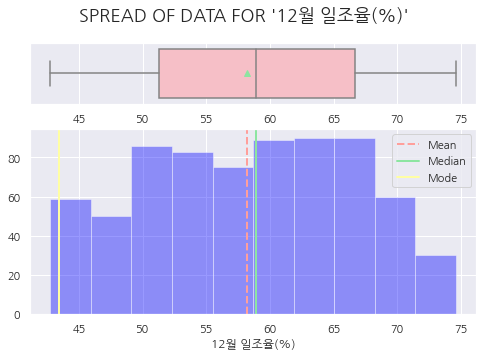

In [ ]:
# (1) '12월 일조율(%)'의 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=fuji['12월 일조율(%)'].mean()
median=fuji['12월 일조율(%)'].median()
mode=fuji['12월 일조율(%)'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR '12월 일조율(%)' "  , fontsize=18, fontweight='bold')
sns.boxplot(x=fuji['12월 일조율(%)'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(fuji['12월 일조율(%)'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [ ]:
# (2) 품질별 '12월 일조율(%)' 그래프
fig = px.box(fuji, x='품질', y='12월 일조율(%)', title='품질별 12월 일조율(%) 분포')
fig.show()

* '태풍횟수'

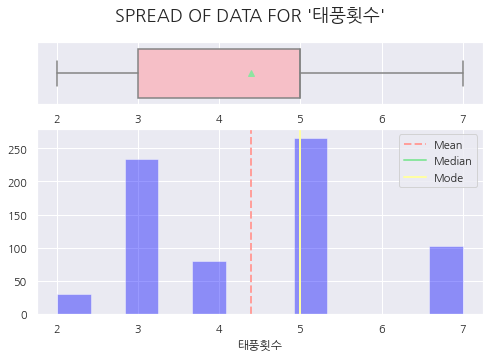

In [ ]:
# (1) '태풍횟수'의 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=fuji['태풍횟수'].mean()
median=fuji['태풍횟수'].median()
mode=fuji['태풍횟수'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR '태풍횟수' "  , fontsize=18, fontweight='bold')
sns.boxplot(x=fuji['태풍횟수'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(fuji['태풍횟수'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [ ]:
# (2) 품질별 '태풍횟수' 그래프
fig = px.box(fuji, x='품질', y='태풍횟수', title='품질별 태풍횟수')
fig.show()

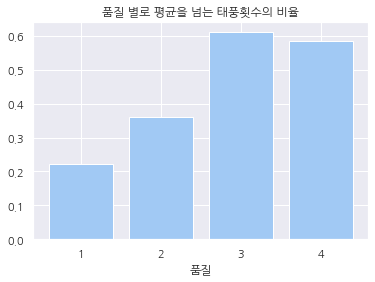

In [ ]:
# (3) 품질 별 평균을 넘는 태풍횟수의 비율
average_typhoon_count = fuji['태풍횟수'].mean()

above_average_ratio = (fuji[fuji['태풍횟수'] > average_typhoon_count].groupby('품질').size() / fuji.groupby('품질').size()).reset_index(name='비율')

plt.bar(above_average_ratio['품질'], above_average_ratio['비율'])
plt.xticks([1,2,3,4])
plt.xlabel('품질')
plt.title('품질 별로 평균을 넘는 태풍횟수의 비율')
plt.show()



* '태풍평균강도'

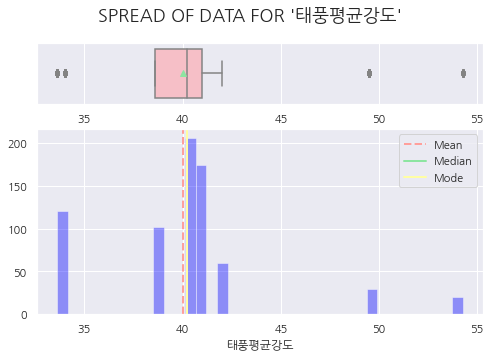

In [ ]:
# (1) '태풍평균강도'의 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=fuji['태풍평균강도'].mean()
median=fuji['태풍평균강도'].median()
mode=fuji['태풍평균강도'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR '태풍평균강도' "  , fontsize=18, fontweight='bold')
sns.boxplot(x=fuji['태풍평균강도'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(fuji['태풍평균강도'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [ ]:
# (2) 품질별 '태풍평균강도' 그래프
fig = px.box(fuji, x='품질', y='태풍평균강도', title='품질별 태풍평균강도')
fig.show()

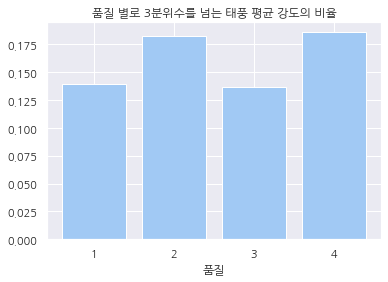

In [ ]:
# (3) 품질 별 3분위 수를 넘는 태풍 평균 강도의 비율
q3_typhoon_intensity = np.percentile(fuji['태풍평균강도'], 75)

above_q3_ratio = (fuji[fuji['태풍평균강도'] > q3_typhoon_intensity].groupby('품질').size() / fuji.groupby('품질').size()).reset_index(name='비율')

plt.bar(above_q3_ratio['품질'], above_q3_ratio['비율'])
plt.xticks([1,2,3,4])
plt.xlabel('품질')
plt.title('품질 별로 3분위수를 넘는 태풍 평균 강도의 비율')
plt.show()


* '폭염일수'

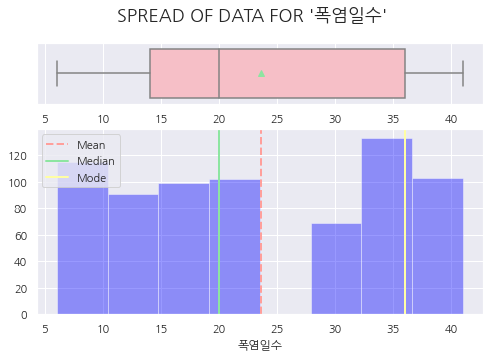

In [ ]:
# (1) '폭염일수'의 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=fuji['폭염일수'].mean()
median=fuji['폭염일수'].median()
mode=fuji['폭염일수'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR '폭염일수'"  , fontsize=18, fontweight='bold')
sns.boxplot(x=fuji['폭염일수'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(fuji['폭염일수'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [ ]:
# (2) 품질별 '폭염일수' 그래프
fig = px.box(fuji, x='품질', y='폭염일수', title='품질별 폭염일수')
fig.show()

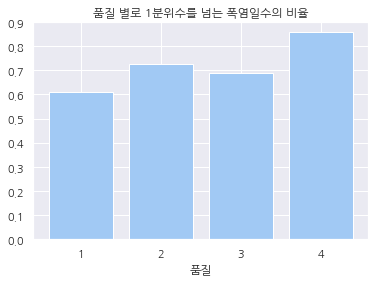

In [ ]:
# (3) 품질 별 1분위수를 넘는 폭염일수의 비율
q1_heat_days = np.percentile(fuji['폭염일수'], 25)

above_q1_ratio = (fuji[fuji['폭염일수'] > q1_heat_days].groupby('품질').size() / fuji.groupby('품질').size()).reset_index(name='비율')

plt.bar(above_q1_ratio['품질'], above_q1_ratio['비율'])
plt.xlabel('품질')
plt.xticks([1,2,3,4])
plt.title('품질 별로 1분위수를 넘는 폭염일수의 비율')
plt.show()

* '장마일수'

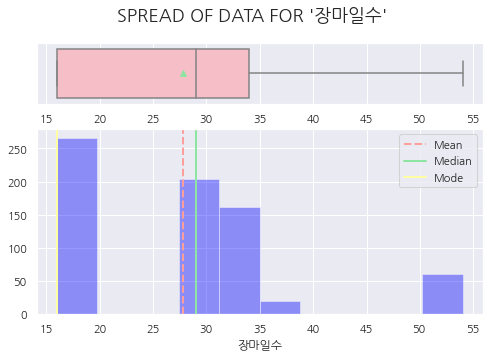

In [ ]:
# (1) '장마일수'의 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=fuji['장마일수'].mean()
median=fuji['장마일수'].median()
mode=fuji['장마일수'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR '장마일수'"  , fontsize=18, fontweight='bold')
sns.boxplot(x=fuji['장마일수'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(fuji['장마일수'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [ ]:
# (2) 품질별 '장마일수' 그래프
fig = px.box(fuji, x='품질', y='장마일수', title='품질별 장마일수')
fig.show()

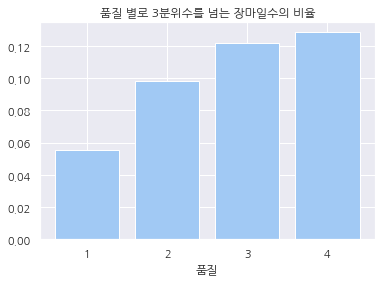

In [ ]:
# (3) 품질 별 3분위수를 넘는 장마일수의 비율
q3_rainy_days = np.percentile(fuji['장마일수'], 75)

above_q3_ratio = (fuji[fuji['장마일수'] > q3_rainy_days].groupby('품질').size() / fuji.groupby('품질').size()).reset_index(name='비율')

plt.bar(above_q3_ratio['품질'], above_q3_ratio['비율'])
plt.xticks([1,2,3,4])
plt.xlabel('품질')
plt.title('품질 별로 3분위수를 넘는 장마일수의 비율')
plt.show()

* '합계강수량'

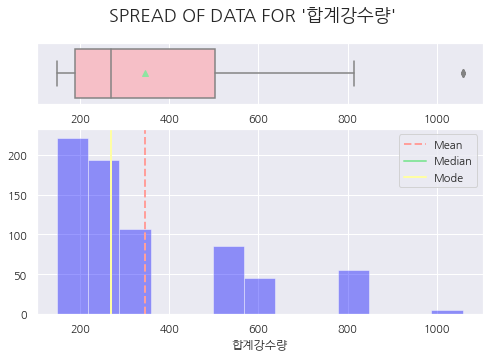

In [ ]:
# (1) '합계강수량'의 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=fuji['합계강수량'].mean()
median=fuji['합계강수량'].median()
mode=fuji['합계강수량'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR '합계강수량'"  , fontsize=18, fontweight='bold')
sns.boxplot(x=fuji['합계강수량'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(fuji['합계강수량'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [ ]:
# (2) 품질별 '합계강수량' 그래프
fig = px.box(fuji, x='품질', y='합계강수량', title='품질별 합계강수량')
fig.show()

# 홍로

In [ ]:
red= pd.read_excel("/home/work/.data/data/red_eda_data.xlsx")

# EDA

In [ ]:
red.describe()

9월 월합강수량(00~24h만)(mm)   1월 일조율(%)  12월 일조율(%)  10월 월합강수량(00~24h만)(mm)  \
count             798.000000  798.000000  798.000000              798.000000   
mean              130.649219   61.739273   57.854536               84.107769   
std                99.452688    7.719462    7.790794               68.071955   
min                25.300000   39.270000   42.750000                2.900000   
25%                61.700000   57.220000   53.210000               28.700000   
50%               130.400000   63.470000   57.700000               73.000000   
75%               163.400000   66.970000   62.260000              112.100000   
max               588.800000   71.840000   74.620000              315.800000   

       7월 월합강수량(00~24h만)(mm)  1월 평균 최고기온(°C)  11월 평균 최고기온(°C)  \
count             798.000000      798.000000       798.000000   
mean              274.219674        4.103759        13.264787   
std               149.647855        2.098230         1.527851   
min               100.200000        0.400000         9.900000   
25%               176.200000        2.600000        12.200000   
50%               222.700000        4.000000        13.400000   
75%               329.800000        5.600000        14.575000   
max               684.500000        8.500000        15.800000   

       11월 월합강수량(00~24h만)(mm)   5월 일조율(%)  1월 합계 일사량(MJ/m2)          품질  \
count              798.000000  798.000000        798.000000  798.000000   
mean                45.537594   58.280752        276.257638    2.715539   
std                 31.495739    9.989561         21.274931    0.883721   
min                  0.100000   43.970000        231.840000    1.000000   
25%                 17.600000   47.405000        275.000000    2.000000   
50%                 42.500000   63.490000        276.257638    3.000000   
75%                 73.900000   67.140000        291.730000    3.000000   
max                104.200000   73.260000        311.430000    4.000000   

              조사연도        태풍횟수      태풍평균강도        폭염일수        장마일수  \
count   798.000000  798.000000  798.000000  798.000000  798.000000   
mean   2018.756892    4.289474   39.568083   24.609023   28.725564   
std       1.835396    1.358154    4.081077    9.697043   11.580112   
min    2015.000000    2.000000   33.600000    9.000000   16.000000   
25%    2017.000000    3.000000   38.570000   16.000000   16.250000   
50%    2018.000000    4.000000   40.200000   29.000000   31.000000   
75%    2020.000000    5.000000   41.000000   36.000000   33.000000   
max    2022.000000    7.000000   54.250000   39.000000   54.000000   

             합계강수량  
count   798.000000  
mean    334.039348  
std     265.730355  
min     123.700000  
25%     188.000000  
50%     268.900000  
75%     304.500000  
max    1057.900000

In [ ]:
red.info()
#결측값 없음
#타겟변수인 품질칼럼 인코딩필요 / 조사일, 과원이름 인코딩 필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   조사일                     798 non-null    datetime64[ns]
 1   과원이름                    798 non-null    object        
 2   9월 월합강수량(00~24h만)(mm)   798 non-null    float64       
 3   1월 일조율(%)               798 non-null    float64       
 4   12월 일조율(%)              798 non-null    float64       
 5   10월 월합강수량(00~24h만)(mm)  798 non-null    float64       
 6   7월 월합강수량(00~24h만)(mm)   798 non-null    float64       
 7   1월 평균 최고기온(°C)          798 non-null    float64       
 8   11월 평균 최고기온(°C)         798 non-null    float64       
 9   11월 월합강수량(00~24h만)(mm)  798 non-null    float64       
 10  5월 일조율(%)               798 non-null    float64       
 11  1월 합계 일사량(MJ/m2)        798 non-null    float64       
 12  품질                      798 non-null    int64     

# 데이터 시각화

In [ ]:
# 시각화에 사용할 팔레트 확인
plt.style.available

sns.color_palette("pastel")
sns.set(palette='pastel')

plt.rc('font', family='NanumGothic')

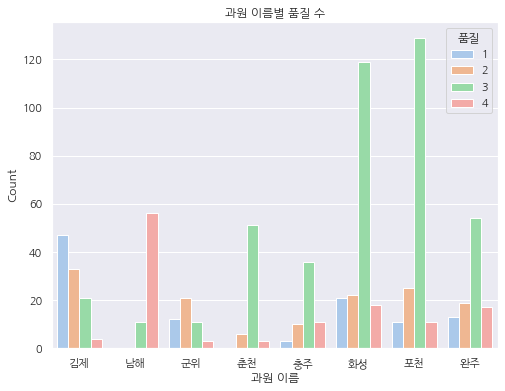

In [ ]:
# 과원별 품질 등급의 수
plt.figure(figsize=(8, 6))
sns.countplot(data=red, x='과원이름', hue='품질')
plt.title('과원 이름별 품질 수')
plt.xlabel('과원 이름')
plt.ylabel('Count')

plt.show()

#과원별로 등급 비율이 다르게 나타남을 볼 수 있다.

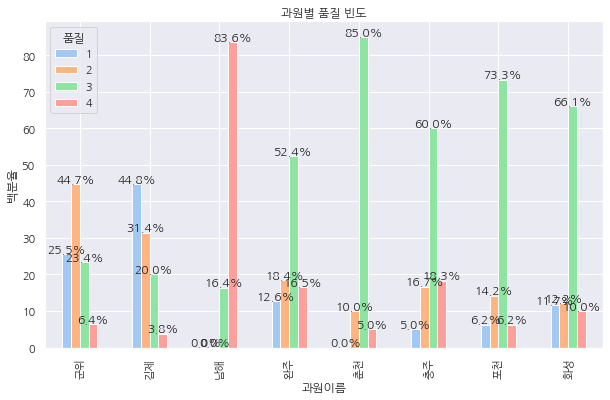

In [ ]:
# 과원별 품질의 비율
# 과원별 품질 빈도 카운트
quality_counts = red.groupby('과원이름')['품질'].value_counts().unstack(fill_value=0)

# 각 연도별로 품질 빈도의 백분율 계산
quality_percentage = quality_counts.div(quality_counts.sum(axis=1), axis=0) * 100

# 막대 그래프로 시각화
ax = quality_percentage.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('과원별 품질 빈도')
plt.xlabel('과원이름')
plt.ylabel('백분율')
plt.legend(title='품질')

# 각 막대의 백분율 텍스트 레이블 추가
for container in ax.containers:
    ax.bar_label(container, fmt='%1.1f%%', label_type='edge')

plt.show()

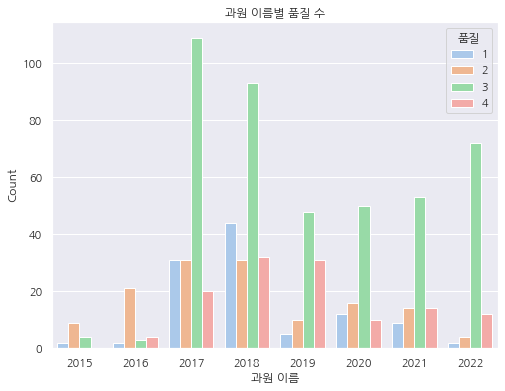

In [ ]:
# 연도별 품질 등급의 수
plt.figure(figsize=(8, 6))
sns.countplot(data=red, x='조사연도', hue='품질')
plt.title('과원 이름별 품질 수')
plt.xlabel('과원 이름')
plt.ylabel('Count')

plt.show()

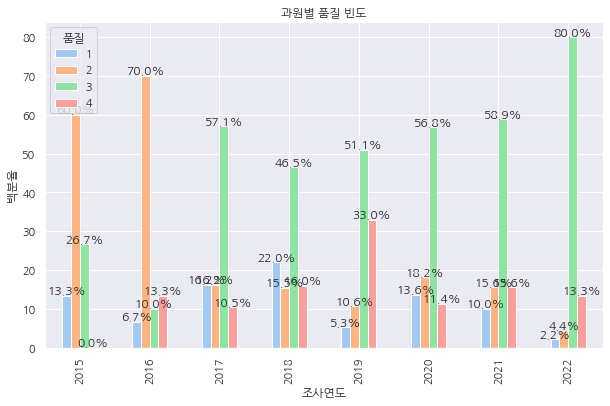

In [ ]:
# 연도별 품질의 비율
# 연도별 품질 빈도 카운트
quality_counts = red.groupby('조사연도')['품질'].value_counts().unstack(fill_value=0)

# 각 연도별로 품질 빈도의 백분율 계산
quality_percentage = quality_counts.div(quality_counts.sum(axis=1), axis=0) * 100

# 막대 그래프로 시각화
ax = quality_percentage.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('과원별 품질 빈도')
plt.xlabel('조사연도')
plt.ylabel('백분율')
plt.legend(title='품질')

# 각 막대의 백분율 텍스트 레이블 추가
for container in ax.containers:
    ax.bar_label(container, fmt='%1.1f%%', label_type='edge')

plt.show()

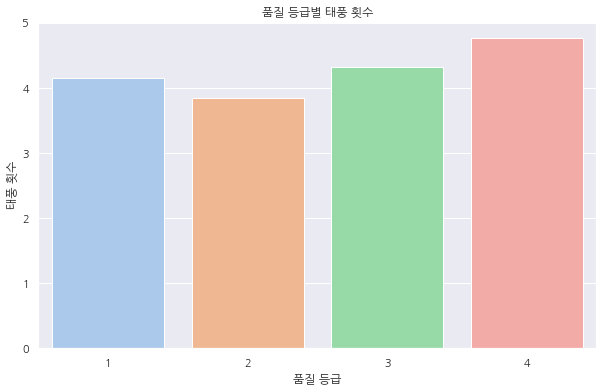

In [ ]:
#품질에 따른 평균 태풍횟수 그래프
quality_counts = (red.groupby('품질')['태풍횟수'].sum()/red.groupby('품질')['태풍횟수'].count()).reset_index()

# 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=quality_counts, x='품질', y='태풍횟수')

plt.title('품질 등급별 태풍 횟수')
plt.xlabel('품질 등급')
plt.ylabel('태풍 횟수')
plt.show()

#태풍 횟수가 많을수록 4등급인 사과가 많은 것으로 보아, 태풍 횟수가 품질에 유의미한 영향을 미치는 것 같다.

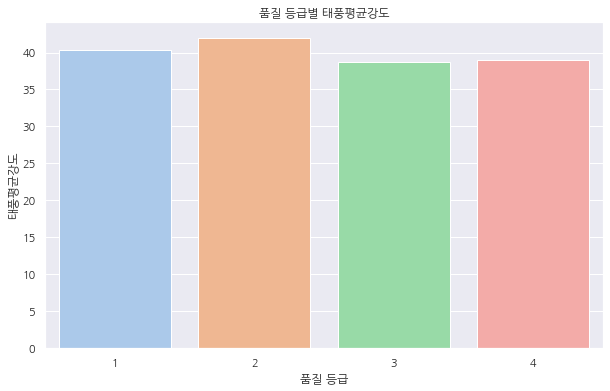

In [ ]:
#태풍 평균 강도
quality_counts = (red.groupby('품질')['태풍평균강도'].sum()/red.groupby('품질')['태풍평균강도'].count()).reset_index()

# 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=quality_counts, x='품질', y='태풍평균강도')

plt.title('품질 등급별 태풍평균강도')
plt.xlabel('품질 등급')
plt.ylabel('태풍평균강도')
plt.show()

#태풍평균강도는 품질간의 큰 관계성은 보이지 않지만 2등급인 사과에서 평균 강도가 센 것으로 보인다.

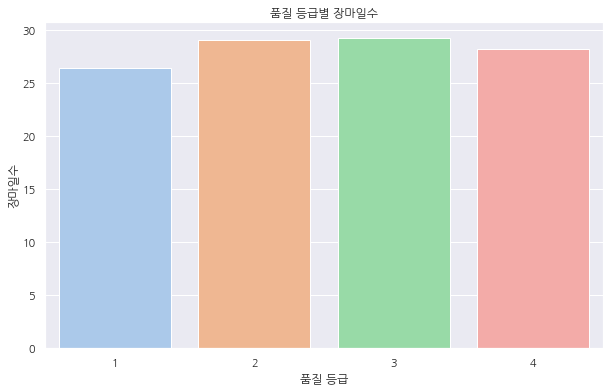

In [ ]:
#품질에 따른 평균 장마일수 그래프
quality_counts = (red.groupby('품질')['장마일수'].sum()/red.groupby('품질')['장마일수'].count()).reset_index()

# 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=quality_counts, x='품질', y='장마일수' )

plt.title('품질 등급별 장마일수')
plt.xlabel('품질 등급')
plt.ylabel('장마일수')
plt.show()

#품질이 안 좋을 수록 평균 장마일수가 길지만 4등급 사과는 장마일수가 3등급 보다는 적다.

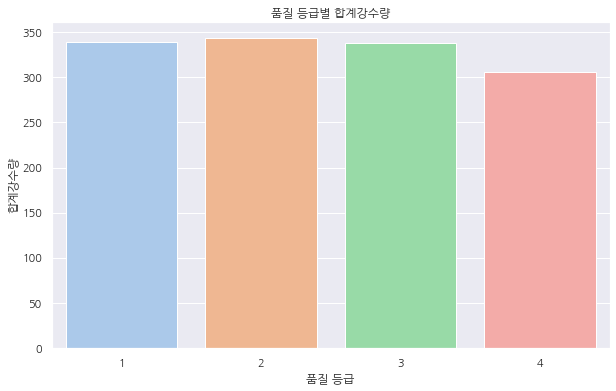

In [ ]:
#품질에 따른 평균 합계강수량 그래프
quality_counts = (red.groupby('품질')['합계강수량'].sum()/red.groupby('품질')['합계강수량'].count()).reset_index()

# 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=quality_counts, x='품질', y='합계강수량' )

plt.title('품질 등급별 합계강수량')
plt.xlabel('품질 등급')
plt.ylabel('합계강수량')
plt.show()

#4등급 사과에서 장마일수가 3등급 사과보다 작았지만, 합계강수량은 더 많음을 보아 강수량이 품질에 많은 영향을 미친다.

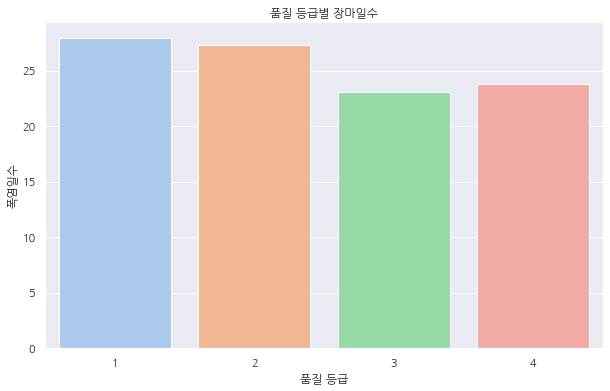

In [ ]:
#품질에 따른 평균 폭염일수 그래프
quality_counts = (red.groupby('품질')['폭염일수'].sum()/red.groupby('품질')['폭염일수'].count()).reset_index()

# 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=quality_counts, x='품질', y='폭염일수' )

plt.title('품질 등급별 장마일수')
plt.xlabel('품질 등급')
plt.ylabel('폭염일수')
plt.show()

#폭염일수가 많을 수록 품질이 좋다고 나타나 예상과 다른 결과이다.

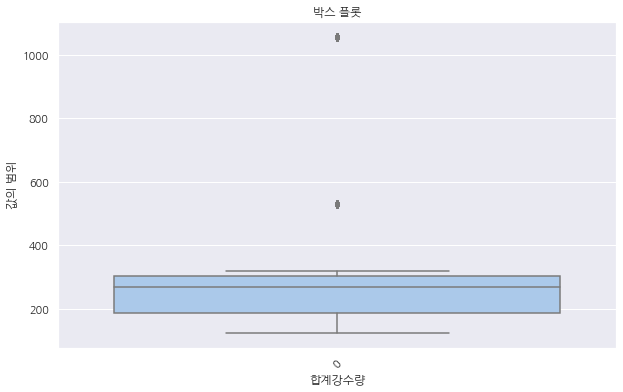

In [ ]:
# 합계강수량 box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=red['합계강수량'])
plt.title('박스 플롯')
plt.xlabel('합계강수량')
plt.ylabel('값의 범위')
plt.xticks(rotation=45)
plt.show()

#이상치가 하나 존재하지만 기준값에서 많이 떨어져있지 않으며, 강수량은 유의미한 변수이므로 그대로 둔다.

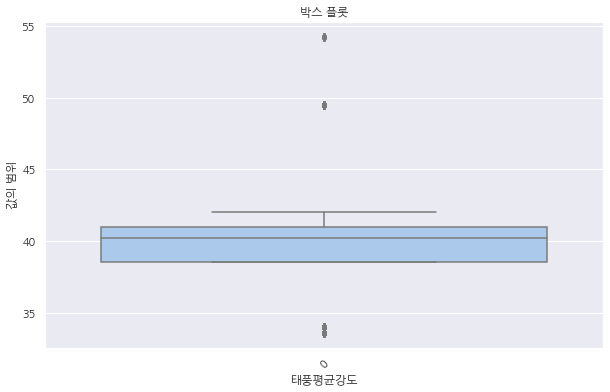

In [ ]:
# 태풍 평균 강도box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=red['태풍평균강도'])
plt.title('박스 플롯')
plt.xlabel('태풍평균강도')
plt.ylabel('값의 범위')
plt.xticks(rotation=45)
plt.show()

#태풍 평균 강도에 이상치가 존재한다. 태풍은 타겟에 유의미한 결과가 보이지 않았으므로 이상치를 대체하도록 한다.

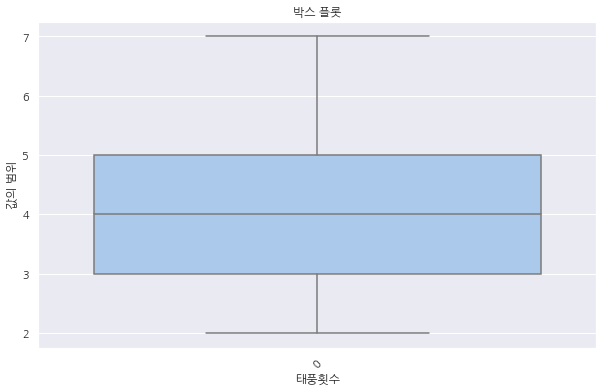

In [ ]:
# 태풍 횟수 box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=red['태풍횟수'])
plt.title('박스 플롯')
plt.xlabel('태풍횟수')
plt.ylabel('값의 범위')
plt.xticks(rotation=45)
plt.show()

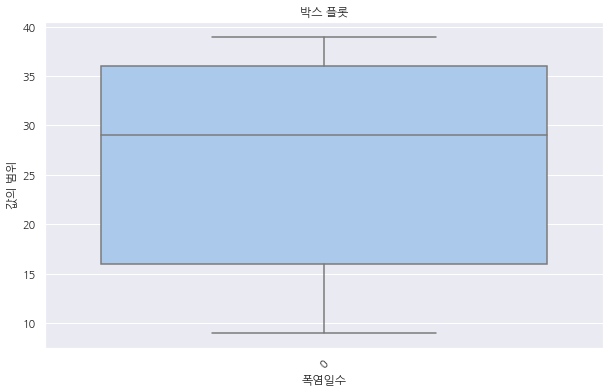

In [ ]:
# 폭염일수 box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=red['폭염일수'])
plt.title('박스 플롯')
plt.xlabel('폭염일수')
plt.ylabel('값의 범위')
plt.xticks(rotation=45)
plt.show()

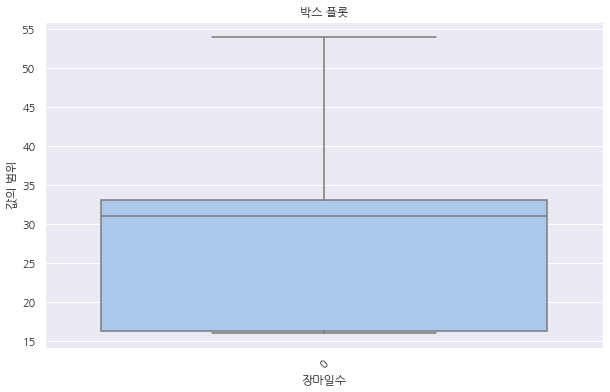

In [ ]:
# 장마일수 box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=red['장마일수'])
plt.title('박스 플롯')
plt.xlabel('장마일수')
plt.ylabel('값의 범위')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import plotly.express as px

- 과원이름

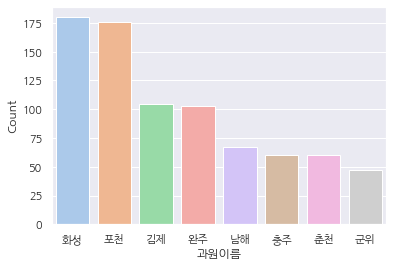

In [ ]:
# (1) 과원이름 변수 분포 확인하기
data_name = red['과원이름'].value_counts()
sns.barplot(x=data_name.index, y=data_name.values )
plt.xlabel('과원이름')
plt.ylabel('Count')
plt.show()

In [ ]:
# (2-1) 과원이름과 품질
px.box(x = '과원이름', y = '품질', data_frame = red, template = 'ggplot2')

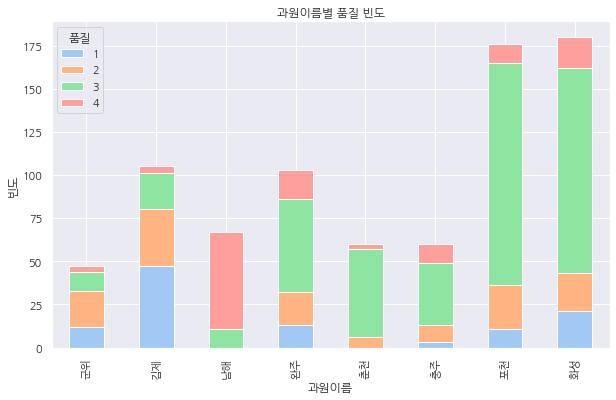

In [ ]:
# (2-2) 과원이름과 품질

quality_counts = red.groupby('과원이름')['품질'].value_counts().unstack(fill_value=0)

# 막대 그래프로 시각화
quality_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('과원이름별 품질 빈도')
plt.xlabel('과원이름')
plt.ylabel('빈도')
plt.legend(title='품질')
plt.show()

- 품질

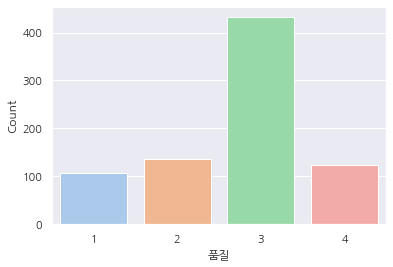

In [ ]:
# (1) 품질 분포 확인하기
data_name = red['품질'].value_counts()
sns.barplot(x=data_name.index, y=data_name.values )
plt.xlabel('품질')
plt.ylabel('Count')
plt.show()

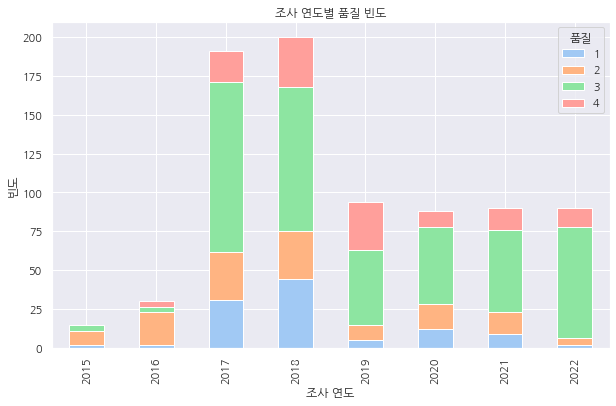

In [ ]:
# (2) 조사 연도별 품질 빈도 카운트
quality_counts = red.groupby('조사연도')['품질'].value_counts().unstack(fill_value=0)

# 막대 그래프로 시각화
quality_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('조사 연도별 품질 빈도')
plt.xlabel('조사 연도')
plt.ylabel('빈도')
plt.legend(title='품질')
plt.show()

- '9월 월합강수량(00~24h만)(mm))'

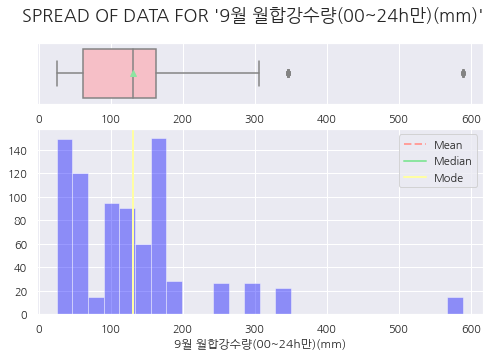

In [ ]:
# (1) 9월 월합강수량(00~24h만)(mm) 의 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=red['9월 월합강수량(00~24h만)(mm)'].mean()
median=red['9월 월합강수량(00~24h만)(mm)'].median()
mode=red['9월 월합강수량(00~24h만)(mm)'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR '9월 월합강수량(00~24h만)(mm)'"  , fontsize=18, fontweight='bold')
sns.boxplot(x=red['9월 월합강수량(00~24h만)(mm)'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(red['9월 월합강수량(00~24h만)(mm)'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [ ]:
# (2) '9월 월합강수량(00~24h만)(mm)' 품질별 그래프
fig = px.box(red, x='품질', y='9월 월합강수량(00~24h만)(mm)', title='품질별 9월 월합강수량(00~24h만)(mm) 분포')
fig.show()

- '1월 일조율(%)'

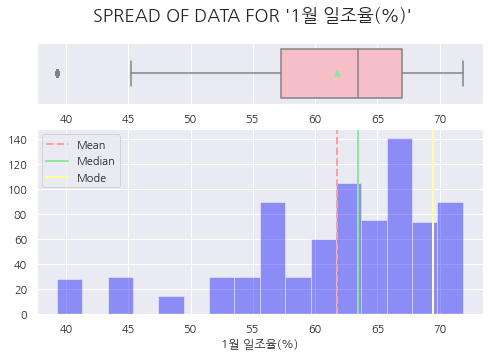

In [ ]:
# (1) 1월 일조율(%) 의 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=red['1월 일조율(%)'].mean()
median=red['1월 일조율(%)'].median()
mode=red['1월 일조율(%)'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR '1월 일조율(%)'"  , fontsize=18, fontweight='bold')
sns.boxplot(x=red['1월 일조율(%)'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(red['1월 일조율(%)'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [ ]:
# (2) '1월 일조율(%)' 품질별 그래프
fig = px.box(red, x='품질', y='1월 일조율(%)', title='품질별 1월 일조율(%) 분포')
fig.show()

- '12월 일조율(%)'

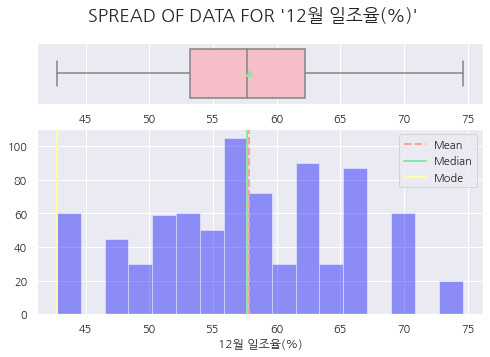

In [ ]:
# (1) 12월 일조율(%) 의 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=red['12월 일조율(%)'].mean()
median=red['12월 일조율(%)'].median()
mode=red['12월 일조율(%)'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR '12월 일조율(%)'"  , fontsize=18, fontweight='bold')
sns.boxplot(x=red['12월 일조율(%)'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(red['12월 일조율(%)'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [ ]:
# (2) '12월 일조율(%)' 품질별 그래프
fig = px.box(red, x='품질', y='12월 일조율(%)', title='품질별 12월 일조율(%) 분포')
fig.show()

- '10월 월합강수량(00~24h만)(mm)'

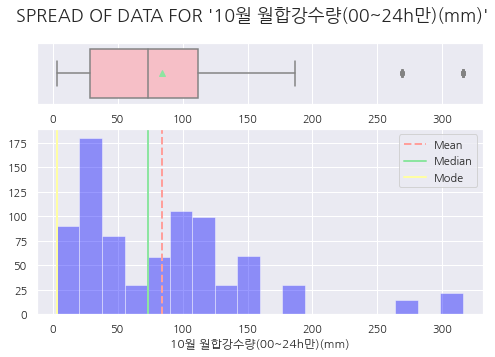

In [ ]:
# (1) 10월 월합강수량(00~24h만)(mm) 의 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=red['10월 월합강수량(00~24h만)(mm)'].mean()
median=red['10월 월합강수량(00~24h만)(mm)'].median()
mode=red['10월 월합강수량(00~24h만)(mm)'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR '10월 월합강수량(00~24h만)(mm)'"  , fontsize=18, fontweight='bold')
sns.boxplot(x=red['10월 월합강수량(00~24h만)(mm)'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(red['10월 월합강수량(00~24h만)(mm)'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [ ]:
# (2) '10월 월합강수량(00~24h만)(mm)' 품질별 그래프
fig = px.box(red, x='품질', y='10월 월합강수량(00~24h만)(mm)', title='품질별 10월 월합강수량(00~24h만)(mm) 분포')
fig.show()

- '7월 월합강수량(00~24h만)(mm)'

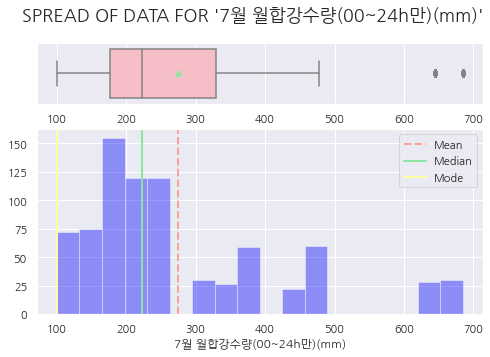

In [ ]:
# (1) 7월 월합강수량(00~24h만)(mm) 의 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=red['7월 월합강수량(00~24h만)(mm)'].mean()
median=red['7월 월합강수량(00~24h만)(mm)'].median()
mode=red['7월 월합강수량(00~24h만)(mm)'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR '7월 월합강수량(00~24h만)(mm)'"  , fontsize=18, fontweight='bold')
sns.boxplot(x=red['7월 월합강수량(00~24h만)(mm)'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(red['7월 월합강수량(00~24h만)(mm)'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [ ]:
# (2) '7월 월합강수량(00~24h만)(mm)' 품질별 그래프
fig = px.box(red, x='품질', y='7월 월합강수량(00~24h만)(mm)', title='품질별 7월 월합강수량(00~24h만)(mm) 분포')
fig.show()

- '1월 평균 최고기온(°C)'

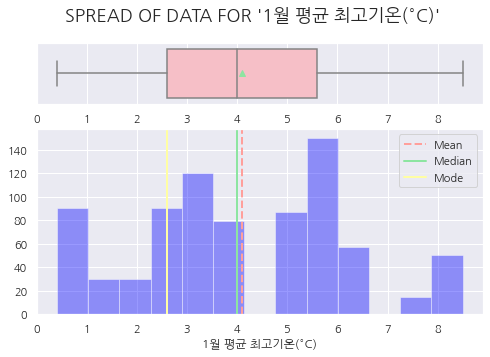

In [ ]:
# (1) 1월 평균 최고기온(°C) 의 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=red['1월 평균 최고기온(°C)'].mean()
median=red['1월 평균 최고기온(°C)'].median()
mode=red['1월 평균 최고기온(°C)'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR '1월 평균 최고기온(°C)'"  , fontsize=18, fontweight='bold')
sns.boxplot(x=red['1월 평균 최고기온(°C)'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(red['1월 평균 최고기온(°C)'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [ ]:
# (2) '1월 평균 최고기온(°C)' 품질별 그래프
fig = px.box(red, x='품질', y='1월 평균 최고기온(°C)', title='품질별 1월 평균 최고기온 분포')
fig.show()

- '11월 평균 최고기온(°C)'

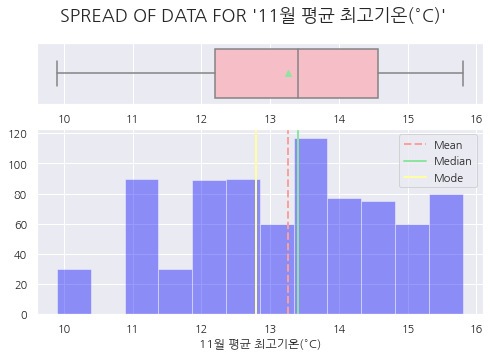

In [ ]:
# (1) 11월 평균 최고기온(°C) 의 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=red['11월 평균 최고기온(°C)'].mean()
median=red['11월 평균 최고기온(°C)'].median()
mode=red['11월 평균 최고기온(°C)'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR '11월 평균 최고기온(°C)'"  , fontsize=18, fontweight='bold')
sns.boxplot(x=red['11월 평균 최고기온(°C)'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(red['11월 평균 최고기온(°C)'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [ ]:
# (2) '11월 평균 최고기온(°C)' 품질별 그래프
fig = px.box(red, x='품질', y='11월 평균 최고기온(°C)', title='품질별 11월 평균 최고기온 분포')
fig.show()

- '11월 월합강수량(00~24h만)(mm)'

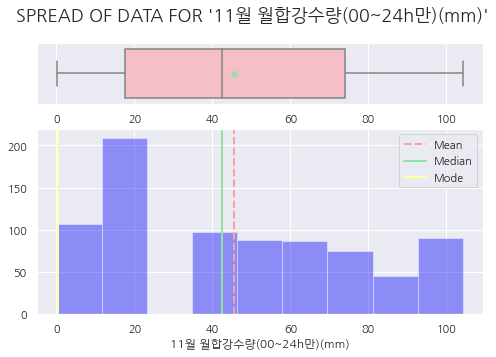

In [ ]:
# (1) 11월 월합강수량(00~24h만)(mm) 의 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=red['11월 월합강수량(00~24h만)(mm)'].mean()
median=red['11월 월합강수량(00~24h만)(mm)'].median()
mode=red['11월 월합강수량(00~24h만)(mm)'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR '11월 월합강수량(00~24h만)(mm)'"  , fontsize=18, fontweight='bold')
sns.boxplot(x=red['11월 월합강수량(00~24h만)(mm)'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(red['11월 월합강수량(00~24h만)(mm)'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [ ]:
# (2) '11월 월합강수량(00~24h만)(mm)' 품질별 그래프
fig = px.box(red, x='품질', y='11월 월합강수량(00~24h만)(mm)', title='품질별 11월 월합강수량(00~24h만)(mm) 분포')
fig.show()

- '5월 일조율(%)'

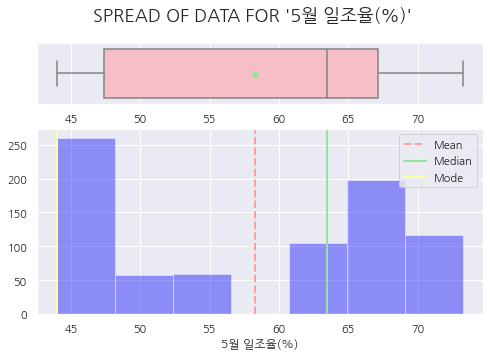

In [ ]:
# (1) 5월 일조율(%) 의 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=red['5월 일조율(%)'].mean()
median=red['5월 일조율(%)'].median()
mode=red['5월 일조율(%)'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR '5월 일조율(%)'"  , fontsize=18, fontweight='bold')
sns.boxplot(x=red['5월 일조율(%)'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(red['5월 일조율(%)'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [ ]:
# (2) '5월 일조율(%)' 품질별 그래프
fig = px.box(red, x='품질', y='5월 일조율(%)', title='품질별 5월 일조율(%) 분포')
fig.show()

- '1월 합계 일사량(MJ/m2)'

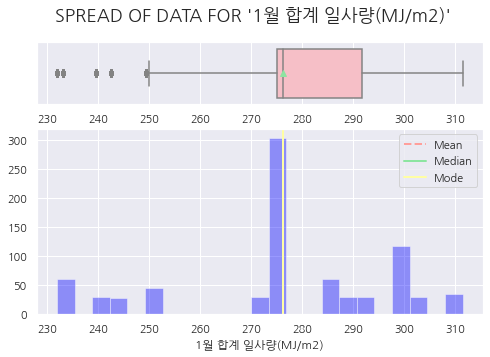

In [ ]:
# (1) 1월 합계 일사량(MJ/m2) 의 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=red['1월 합계 일사량(MJ/m2)'].mean()
median=red['1월 합계 일사량(MJ/m2)'].median()
mode=red['1월 합계 일사량(MJ/m2)'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR '1월 합계 일사량(MJ/m2)'"  , fontsize=18, fontweight='bold')
sns.boxplot(x=red['1월 합계 일사량(MJ/m2)'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(red['1월 합계 일사량(MJ/m2)'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [ ]:
# (2) '1월 합계 일사량(MJ/m2)' 품질별 그래프
fig = px.box(red, x='품질', y='1월 합계 일사량(MJ/m2)', title='품질별 1월 합계 일사량(MJ/m2) 분포')
fig.show()